# Cancer treatment response prediction

## Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

use_metadata = True
use_cancer_type = False
use_gender_one_hot_encoding = False
use_contribution = False

# Load data
if use_contribution == True:
    data = pd.read_csv("output_denovo_relative_contribution_rank4.txt", index_col = 0)
else:
    data = pd.read_csv("output_cos_sim_samples_signatures_exomes.txt", index_col = 0)
    
metadata = pd.read_csv("output_metadata_case_samples.txt", index_col = 0)
print(data.shape)
print(metadata.shape)
data

(15, 65)
(15, 5)


,S_1,S_2,S_3,S_4,S_5,S_6,S_7a,S_7b,S_7c,S_7d,...,S_51,S_52,S_53,S_54,S_55,S_56,S_57,S_58,S_59,S_60
SampleID,,,,,,,,,,,,,,,,,,,,,
FE069,0.331699,0.173742,0.697399,0.472807,0.705309,0.384093,0.238075,0.317033,0.271562,0.257442,...,0.607224,0.142905,0.265989,0.291635,0.642500,0.201218,0.405184,0.491450,0.104565,0.631494
FE070,0.348895,0.170347,0.704214,0.510503,0.700821,0.397201,0.222327,0.265217,0.256078,0.231807,...,0.625651,0.165043,0.290183,0.336730,0.621923,0.167474,0.447135,0.470348,0.153614,0.606025
FE071,0.324706,0.225602,0.727496,0.457535,0.733098,0.401784,0.283772,0.321236,0.250556,0.197332,...,0.595494,0.173724,0.285163,0.315689,0.584464,0.160705,0.415465,0.503017,0.104941,0.549847
FE072,0.273225,0.108293,0.573661,0.413258,0.560997,0.363964,0.146719,0.205145,0.224366,0.165047,...,0.596900,0.155550,0.242403,0.216344,0.746858,0.168261,0.313896,0.403121,0.098568,0.778466
FE073,0.329857,0.109089,0.638957,0.418171,0.662680,0.402880,0.189827,0.273086,0.246608,0.215026,...,0.612688,0.151699,0.280912,0.312454,0.693375,0.159921,0.395863,0.461114,0.094066,0.704345
FE074,0.313888,0.130276,0.654237,0.421746,0.678457,0.380405,0.206172,0.308459,0.226214,0.227283,...,0.573611,0.141479,0.219990,0.312173,0.667231,0.163169,0.374327,0.449205,0.195839,0.654375
FE075,0.307916,0.346014,0.537965,0.307169,0.681148,0.446647,0.276243,0.344155,0.179634,0.255762,...,0.737871,0.114398,0.141216,0.282266,0.280612,0.124190,0.431680,0.781142,0.064796,0.208468
FE076,0.523517,0.159738,0.653167,0.412829,0.749740,0.563498,0.245228,0.310772,0.307399,0.221551,...,0.607110,0.150953,0.219563,0.318531,0.574430,0.194724,0.473885,0.450311,0.137162,0.558090
FE077,0.176079,0.122178,0.535096,0.330714,0.481202,0.220765,0.169319,0.212877,0.189801,0.152371,...,0.550159,0.126682,0.186545,0.187796,0.820143,0.138343,0.275975,0.367110,0.096047,0.855429


### Encoding

In [2]:
# Assign temporarily 1 to the missing response 
metadata["Response"] = metadata["Response"].fillna(1).astype(int)

if use_cancer_type == True:
    # Cancer type to one hot encoding
    for i, cancer in enumerate(metadata["Subtype"]):
        one_hot_cancer = np.array(metadata["Subtype"] == cancer) * 1 
        metadata[cancer] = one_hot_cancer

# Gender
if use_gender_one_hot_encoding:
    # Convert gender feature to one hot encoding
    for i, gender in enumerate(metadata["Gender"]):
        one_hot_gender = np.array(metadata["Gender"] == gender) * 1 
        metadata[gender] = one_hot_gender
else:
    # Encode as 0 and 1
    metadata.loc[metadata["Gender"] == "Female", "Gender"] = 0
    metadata.loc[metadata["Gender"] == "Male", "Gender"] = 1
metadata 

,Age,Gender,Subtype,Response,TMB
SampleID,,,,,
FE069,76,0,Ovarian c.,0,26.2
FE070,72,1,Prostate c.,1,50.0
FE071,69,0,Endometrial c.,0,52.8
FE072,69,1,Prostate c.,1,50.6
FE073,68,1,Prostate c.,1,39.5
FE074,64,0,Ovarian c.,1,30.8
FE075,63,0,Ovarian c.,0,100.2
FE076,58,1,Prostate c.,0,31.1
FE077,54,0,Ovarian c.,1,56.7


In [3]:
# Add metadata to the predictor variables
if use_metadata == True:
    if use_gender_one_hot_encoding == True:
        data = pd.merge(data, metadata.drop(columns=["Subtype", "Gender", "Response"]), 
                        left_index=True, right_index=True)
    else:
        data = pd.merge(data, metadata.drop(columns=["Subtype", "Response"]), 
                        left_index=True, right_index=True)
    print(np.shape(data))
data

(15, 68)


,S_1,S_2,S_3,S_4,S_5,S_6,S_7a,S_7b,S_7c,S_7d,...,S_54,S_55,S_56,S_57,S_58,S_59,S_60,Age,Gender,TMB
SampleID,,,,,,,,,,,,,,,,,,,,,
FE069,0.331699,0.173742,0.697399,0.472807,0.705309,0.384093,0.238075,0.317033,0.271562,0.257442,...,0.291635,0.642500,0.201218,0.405184,0.491450,0.104565,0.631494,76,0,26.2
FE070,0.348895,0.170347,0.704214,0.510503,0.700821,0.397201,0.222327,0.265217,0.256078,0.231807,...,0.336730,0.621923,0.167474,0.447135,0.470348,0.153614,0.606025,72,1,50.0
FE071,0.324706,0.225602,0.727496,0.457535,0.733098,0.401784,0.283772,0.321236,0.250556,0.197332,...,0.315689,0.584464,0.160705,0.415465,0.503017,0.104941,0.549847,69,0,52.8
FE072,0.273225,0.108293,0.573661,0.413258,0.560997,0.363964,0.146719,0.205145,0.224366,0.165047,...,0.216344,0.746858,0.168261,0.313896,0.403121,0.098568,0.778466,69,1,50.6
FE073,0.329857,0.109089,0.638957,0.418171,0.662680,0.402880,0.189827,0.273086,0.246608,0.215026,...,0.312454,0.693375,0.159921,0.395863,0.461114,0.094066,0.704345,68,1,39.5
FE074,0.313888,0.130276,0.654237,0.421746,0.678457,0.380405,0.206172,0.308459,0.226214,0.227283,...,0.312173,0.667231,0.163169,0.374327,0.449205,0.195839,0.654375,64,0,30.8
FE075,0.307916,0.346014,0.537965,0.307169,0.681148,0.446647,0.276243,0.344155,0.179634,0.255762,...,0.282266,0.280612,0.124190,0.431680,0.781142,0.064796,0.208468,63,0,100.2
FE076,0.523517,0.159738,0.653167,0.412829,0.749740,0.563498,0.245228,0.310772,0.307399,0.221551,...,0.318531,0.574430,0.194724,0.473885,0.450311,0.137162,0.558090,58,1,31.1
FE077,0.176079,0.122178,0.535096,0.330714,0.481202,0.220765,0.169319,0.212877,0.189801,0.152371,...,0.187796,0.820143,0.138343,0.275975,0.367110,0.096047,0.855429,54,0,56.7


In [4]:
# Set predictors and target
XTrain = np.array(data)
YTrain = np.array(metadata["Response"])

## Linear discriminant analysis

In [5]:
class LDA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            # (4, n_c) * (n_c, 4) = (4,4) -> transpose
            SW += (X_c - mean_c).T.dot((X_c - mean_c))
            # (4, 1) * (1, 4) = (4,4) -> reshape
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determine SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvalues high to low
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.linear_discriminants = eigenvectors[0:self.n_components]

    def transform(self, X):
        # project data
        return np.dot(X, self.linear_discriminants.T)

Shape of X: (15, 68)
Shape of transformed X: (15, 2)


C:\Users\stefa\Anaconda3\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


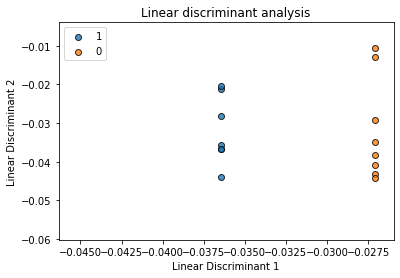

In [6]:
one = [YTrain == 1]
zero = [YTrain == 0]

# Project the data onto the 2 primary linear discriminants
lda = LDA(2)
lda.fit(XTrain, YTrain)
X_projected = lda.transform(XTrain)

print('Shape of X:', XTrain.shape)
print('Shape of transformed X:', X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1[tuple(one)], x2[tuple(one)], label = "1", edgecolor='black', alpha=0.8)
plt.scatter(x1[tuple(zero)], x2[tuple(zero)], label = "0", edgecolor='black', alpha=0.8)

plt.title("Linear discriminant analysis")
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(loc = "best")
plt.show()

## Some useful functions

In [7]:
def pca(data):
    """
    Take as argument data with column 
    as features and rows as observations.
    Return eigenvectors and eigenvalues 
    both sorted from eigenvalues (variance)
    """
    # Obtain covariance matrix
    sigma = np.cov(data.T)
    # Obtain sorted eigenvalues and eigenvectors
    eigvals, eigvect = np.linalg.eig(sigma)
    # Sort them based on eigenvectors
    eigvals, eigvect = np.linalg.eigh(sigma)
    sorted_eigvals = eigvals[::-1]
    sorted_eigvect = eigvect[:,::-1]
    return sorted_eigvals, sorted_eigvect

def dim_reduction(data, dimensions = 2):
    """
    Take a n by m matrix as input and return
    a n by k matrix as output (reduction to kD), 
    where k are the matrix dimensions after the 
    linear transformation.
    """
    # PCA
    eigvals, eigvect = pca(data)
    # Dimensionality reduction
    Q = eigvect[:,:dimensions] 
    data_projected = Q.T @ data.T 
    return data_projected.T        

def dim_reduction_split_data(train, test=None, dimensions = 2):
    """
    Dimensionality reduction function for train
    and test splitted data. It also return the 
    variance captured by the principal components
    """
    # PCA
    eigvals, eigvect = pca(train)
    # Dimensionality reduction
    Q = eigvect[:,:dimensions] 
    train_projected = Q.T @ train.T 
    if test is None:
        return train_projected.T, eigvals   
    else:
        test_projected = Q.T @ test.T 
        return train_projected.T, test_projected.T, eigvals

# Plot data
def plot_details(title = "",
                 xlabel = "X-axis", 
                 ylabel = "Y-axis",
                 ax_equal = False,
                 legend = False, 
                 leg_loc = "upper right",
                 grid = False,
                 bg = False,
                 bg_color = "lightgray",
                 save = False,
                 filename = False):
    """
    Add plot details like title, xlabe, ylabel and other options: 
    legend and its location, equal axis, background and its color, 
    save file and filename.
    """
    # Title and axis
    plt.title(title)
    plt.xlabel(xlabel, fontsize=13)
    plt.ylabel(ylabel, fontsize=13)
    # Set equal axis
    if ax_equal == True:
        plt.axis('equal') 
    # Legend
    if legend == True:
        legend = plt.legend(frameon = 1, loc = leg_loc, shadow = True)
        frame = legend.get_frame()
        frame.set_facecolor('white')
        frame.set_edgecolor('black')
    # Set background and grid
    if grid == True:
        plt.grid(zorder=0, color="lightgray")
    if bg == True:
        plt.grid(zorder=0, color="white")
        ax = plt.gca()
        ax.set_facecolor(bg_color)
    # Output
    if save == True:
        if filename == False:
            plt.savefig(title + ".png",
                        dpi = 300)
        else:
            plt.savefig(filename + ".png",
                        dpi = 300)
        plt.clf()
    else:
        plt.show()

# Function to quickly plot data with binary classes
def easy_plot_classes(class0, class1, title = "Classes scatter plot", save = False,
                      xlabel = "X-axis", ylabel = "Y-axis"):
    plt.scatter(class0[:,0], class0[:,1], ec = "black", label = "Class 0", zorder=3)
    plt.scatter(class1[:,0], class1[:,1], color = "red", ec = "black", label = "Class 1", zorder=3)
    plot_details(title = title,
                 xlabel = xlabel,
                 ylabel = ylabel,
                 ax_equal = True,
                 bg = True, 
                 legend = True,
                 leg_loc = "upper left",
                 save = save,
                 filename = "results_modeling/" + title)
    
# Standardization function
def standardize(train, test=None):
    """
    Center and normalize data.
    """
    m = np.mean(train, axis = 0)
    s = np.std(train, axis = 0)
    train_standardized = (train - m) / s 
    if test is None:
        return train_standardized  
    else:
        test_standardized = test - m / s
        return train_standardized, test_standardized

## Preprocessing

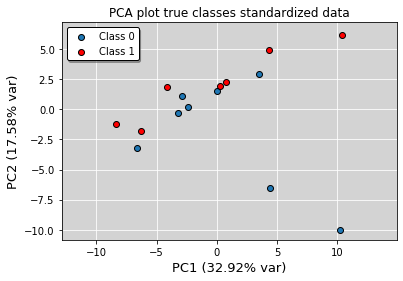

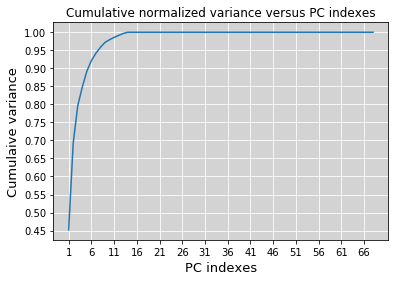


To capture 95% of variance we need 8 PCs
To capture 90% of variance we need 6 PCs


In [8]:
if use_metadata == False:
    # Perform MDS
    eigvals, eigvect = pca(XTrain)
    XTrain_2D = dim_reduction(XTrain) 
    pc1_label = "PC1 (" + str(round(eigvals[0], 2)) + "% var)" 
    pc2_label = "PC2 (" + str(round(eigvals[1], 2)) + "% var)" 

    # Plot data
    easy_plot_classes(XTrain_2D[YTrain == 0,:], XTrain_2D[YTrain == 1,:],                        
                      title = "PCA plot true classes", save = False, 
                      xlabel = pc1_label, 
                      ylabel = pc2_label)

# Standardize
XTrain = standardize(XTrain)

# PCA
eigvals, eigvect = pca(XTrain)
XTrain_2D = dim_reduction(XTrain)  
pc1_label = "PC1 (" + str(round(eigvals[0], 2)) + "% var)" 
pc2_label = "PC2 (" + str(round(eigvals[1], 2)) + "% var)" 

# Plot data after standardization
easy_plot_classes(XTrain_2D[YTrain == 0,:], XTrain_2D[YTrain == 1,:],                        
                  title = "PCA plot true classes standardized data", save = False,                
                  xlabel = pc1_label, 
                  ylabel = pc2_label)

# Cumulative sum of normalized variance among the principal components
eigvals, eigvect = pca(XTrain)
cum_var = np.cumsum(eigvals/np.sum(eigvals)) 
Nvar = eigvals/np.sum(eigvals)

# Plot the cumulative normalized variance against the pcs
plt.plot(np.arange(1,len(cum_var)+1), cum_var)
plt.xticks(np.arange(1,70,5))
plt.yticks(np.arange(0.45,1.02,0.05))
title = "Cumulative normalized variance versus PC indexes"
plot_details(title = title,
             xlabel = "PC indexes",
             ylabel = "Cumulaive variance",
             bg = True, 
             legend = False,
             leg_loc = "upper left",
             save = False,
             filename = "results_modeling/" + title)


# Check how many dimensions are needed to capute the first 95% and 90% of variance
def get_needed_pcs(var_wanted, cum_var_list):
    """
    Return the number of principal components 
    needed to campute the requested variance.
    """
    pcs_needed = 0
    total_var = 0
    for i, var in enumerate(cum_var_list):
        if total_var >= var_wanted:
            break
        else:
            total_var = var
            pcs_needed += 1
    return pcs_needed

print("\nTo capture 95%% of variance we need %d PCs" % get_needed_pcs(0.95, cum_var))
print("To capture 90%% of variance we need %d PCs" % get_needed_pcs(0.90, cum_var))


## Logistic regression

In [9]:
# Define the logistic function
def logistic(input):
    """
    Logistic function.
    """
    out = 1 /(1+np.exp(-input))
    return out

# Define in-sample error function
def logistic_Ein(x, y ,w):
    """
    Logistic regression loss function.
    """
    N = len(x)
    # Compute wx, return a vector (w.T = w)
    wx = w @ x.T
    # y * wx, return a vector
    ywx = y * wx
    # Compute ln(1/s(ywx)), for all values of yn and xn. Sum them and divide for N.
    ln_vector = np.log(1 / logistic(ywx))
    E = np.sum(ln_vector) / N
    return E

# Define the gradient function
def logistic_gradient(x, y, w):
    """
    Logistic regression gradient function.
    """
    N = len(x)
    # Just to return a 0 vector of the right dimension
    g = 0 * w 
    # Compute wx (w.T = w)
    wx = w @ x.T
    # Compute scalar multiplication yx
    yx = np.multiply(y, x.T).T
    # Plug in -ywx in the logistic function
    logistic_result = logistic(-y * wx)
    # Obtain the gradient (vector of length 3) by computing: column wise sum(-yx * logistic(-ywx)) / nrows
    g = np.sum(np.multiply(logistic_result, -yx.T).T, axis = 0) / N
    return g

# Define the logistic regression function
def logistic_reg(x, y, 
                 max_iter = 20000, 
                 learningrate = 0.1, 
                 grad_threshold = 0, 
                 print_num_iter = False):
    """
    Logistic regression function.
    """  
    ## Initialization 
    N, num_feat = x.shape
    # Add one to dataset matrix                           
    onevec = np.ones((N, 1))                   
    x = np.concatenate((onevec, x), axis = 1)
    # Transform y to a N by 1 matrix of target values -1 and 1
    y = np.array((y - .5) * 2)
    # Initialize learning rate for gradient descent
    learningrate = learningrate        
    # Initialize weights at time step 0    
    np.random.seed(0)
    w = 0.1 * np.random.randn(num_feat + 1)
    # Compute value of logistic log likelihood
    value = logistic_Ein(x,y,w)
    num_iter = 0  
    convergence = 0
    # Keep track of function values
    E = 0
    # Start iterations
    while convergence == 0:
        num_iter = num_iter + 1                       
        ## Compute the gradient and take a step in the opposite direction
        g = logistic_gradient(x,y,w)     
        w_new = w - g * learningrate
        ## Check for improvement
        # Compute in-sample error for new w
        cur_value = logistic_Ein(x,y,w_new)
        # If there is improvement we update w and increase the learning rate
        if cur_value < value:
            w = w_new
            value = cur_value
            learningrate *= 1.1
        # If we don't have improvement we discard w and try again with smaller learning rate
        else:
            learningrate *= 0.9              
        ## Check if stop-criteria are satisfied 
        # Check if gradient norm is below threshold or max iterations reached
        g_norm = np.linalg.norm(g)
        if g_norm < grad_threshold or num_iter > max_iter:
            if print_num_iter == True:
                print("Reached convergence at %d iterations" % (num_iter - 1))
            convergence = 1   
            E = value
    return w, E

# Define function to get the class from probabily
def get_class_by_prob(yprob, threshold = 0.5):
    """
    Function that given an array of probabily, it 
    return an array of classes. The class is 1 if 
    the probabily of that record is larger or equal 
    than threshold, 0 otherwise.
    """
    # Inizialization
    ypred = np.zeros(len(yprob), dtype = np.int)
    # Get indexes of points classified as 1
    indexes_class1 = np.where(yprob >= threshold)
    # Update the inizialized array
    ypred[indexes_class1] = 1
    return ypred

# Define function for target prediction by logistic regression
def logistic_pred(x, w, threshold = 0.5):
    """
    Logistic regression target prediction function.
    """
    N = len(x)
    # Add a first column with ones
    onevec = np.ones((N,1))                            
    x = np.concatenate((onevec, x), axis = 1) 
    # Compute the probability that the class is 1
    yprob = logistic(w @ x.T) 
    # Get the predicted class
    ypred = get_class_by_prob(yprob, threshold)
    return yprob, ypred

# Define the function that obtain w from train set and use it to predict y of test set
def logistic_train_and_pred(xtrain, ytrain, xtest, 
                            prob = False, 
                            print_w = False, 
                            print_num_iter = False):
    """
    Function that train the model (obtains w) from
    training set and predict the target values of 
    a test set.
    """
    w = logistic_reg(xtrain, ytrain, print_num_iter = print_num_iter)[0]
    if print_w == True:
        print("Parameters of the linear model =\n", w)
    yprob, ypred = logistic_pred(xtest, w)
    if prob == False:
        return ypred
    elif prob == True:
        return yprob
    else:
        print("\n>> Error: prob argument has the wrong type <<\n")

# Function to compute the error
def zero_one_error(ypred, ytrue):
    """
    Evaluate the performance of a classifier
    as a 0-1 loss function. 
    """
    error = np.sum(ypred != ytrue) / len(ypred)
    return error

# Function to plot the decision boundary   
def visualize_classifier_pred(xtrain, ytrain, xtest, ytest, ypred,
                              a_xlim = -5, bxlim = 5,
                              title = "Logistic regresison decision boundary",
                              save = True, CV = True,
                              decision_boundary = True,
                              use_scikit_learn = False):
    """
    The function uses the train set to obtain the parameters w. 
    Then evaluate the performance of the model obtained by 
    plotting both, the decision boundary and the classes division 
    of the data.
    """  
    if decision_boundary == True:
        if use_scikit_learn == True:
                # Scikit-learn logistic regression
                clf = LogisticRegression(solver='lbfgs', 
                                         random_state=0, 
                                         max_iter = 2000).fit(xtrain, ytrain)
                w = np.insert(clf.coef_, 0, clf.intercept_)
        else:
                # Get the logistic regression parameters by gradient descent
                w, _ = logistic_reg(xtrain, ytrain)
        # Get x and y values for the decision boundary
        x_values = [np.min(xtrain[:, 1] + a_xlim), np.max(xtrain[:, 1] + bxlim)]
        y_values = np.dot((-1. / w[2]), (np.dot(w[1], x_values) + w[0]))

    # Assign classes colors
    true = ypred == ytest
    true_0 = (xtest[true])[ytest[true] == 0]
    true_1 = (xtest[true])[ytest[true] == 1]
    wrong = xtest[ypred != ytest]
    wrong = ypred != ytest
    wrong_0 = (xtest[wrong])[ytest[wrong] == 0]
    wrong_1 = (xtest[wrong])[ytest[wrong] == 1]
    
    xtrain_0 = xtrain[ytrain == 0]
    xtrain_1 = xtrain[ytrain ==1]

    # Plot points
    if CV == True:
        plt.scatter(xtrain_0[:, 0], xtrain_0[:, 1], 
                    label = "Train class 0", color = "C0", ec = "black", zorder = 2)
        plt.scatter(xtrain_1[:, 0], xtrain_1[:, 1], 
                    label = "Train class 1", color = "red", ec = "black", zorder = 2)
    if len(true_0) > 0:
        plt.scatter(true_0[:, 0], true_0[:, 1], 
                    label = "True pred 0", s = 75, marker = "X", color = "C0", ec = "black", zorder = 2)
    if len(true_1) > 0:
        plt.scatter(true_1[:, 0], true_1[:, 1], 
                    label = "True pred 1", s = 75, marker = "X", color = "red", ec = "black", zorder = 2)
#    if len(wrong) > 0:
#        plt.scatter(wrong[:, 0], wrong[:, 1], 
#                    label = "Wrong pred", s = 75, marker = "X", color = "yellow", ec = "black", zorder = 3)

    if len(wrong_0) > 0:
            plt.scatter(wrong_0[:, 0], wrong_0[:, 1], 
            label = "Pred 1 True 0", s = 75, marker = "X", color = "LimeGreen", ec = "black", zorder = 3)
    if len(wrong_1) > 0:
            plt.scatter(wrong_1[:, 0], wrong_1[:, 1], 
            label = "Pred 0 True 1", s = 75, marker = "X", color = "yellow", ec = "black", zorder = 3)

    
    # Plot decision boundary
    if decision_boundary == True:
        plt.plot(x_values, y_values, label = 'Decision Boundary', color = "green", zorder = 3)
    # Add plot details
    plot_details(title = title,
                 xlabel = pc1_label, 
                 ylabel = pc2_label,
                 ax_equal = True,
                 grid = True,
                 bg = False, 
                 legend = True,
                 leg_loc = "best",
                 save = save,
                 filename = "results_modeling/" + title)

### Logistic regression prediction after PCA
#### Accuracy and visualization on training set


> Training data:
Reached convergence at 20000 iterations
Parameters of the linear model =
 [-2.72413296 -0.70020519  1.68555055]
Training error = 0.133
Training accuracy = 86.667%


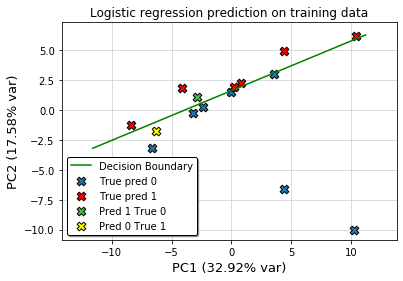

In [10]:
print("\n> Training data:")
ypred_train = logistic_train_and_pred(XTrain_2D, YTrain, XTrain_2D, 
                                       print_w = True, print_num_iter = True)
print("Training error = {:.3f}".format(zero_one_error(ypred_train, YTrain)))
print("Training accuracy = {:.3f}%".format((1 - zero_one_error(ypred_train, YTrain))* 100))

# Plot decision boundary and prediction on training data
# Get coefficients
w, _ = logistic_reg(XTrain_2D, YTrain)
# Get predictions
_, ypred = logistic_pred(XTrain_2D, w)
visualize_classifier_pred(XTrain_2D, YTrain, XTrain_2D, YTrain, ypred,
                          a_xlim = -1.6, bxlim = 5,
                          title = "Logistic regression prediction on training data",
                          save = False, CV = False)

#### Accuracy and visualization on test set by LOO CV

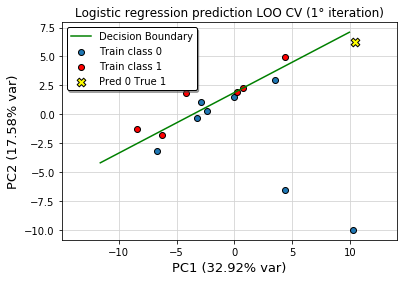

Iteration 1 error = 1.0


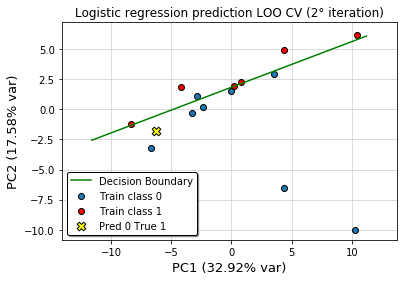

Iteration 2 error = 1.0


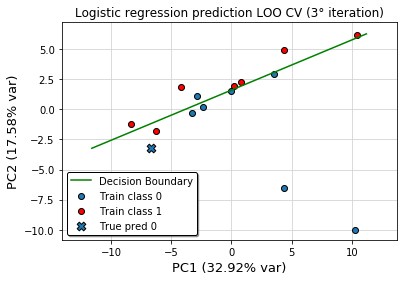

Iteration 3 error = 0.0


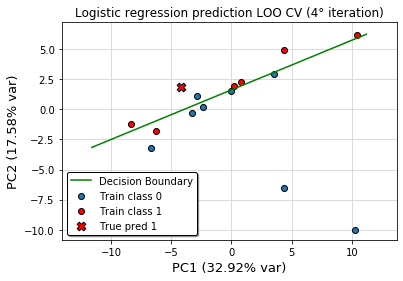

Iteration 4 error = 0.0


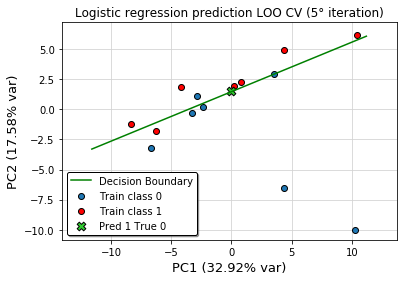

Iteration 5 error = 1.0


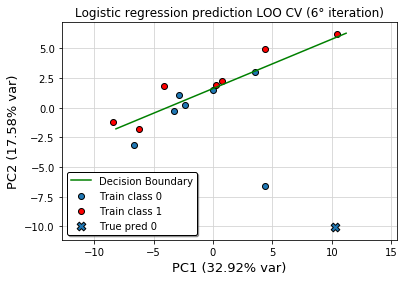

Iteration 6 error = 0.0


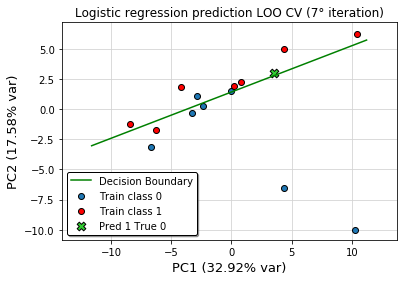

Iteration 7 error = 1.0


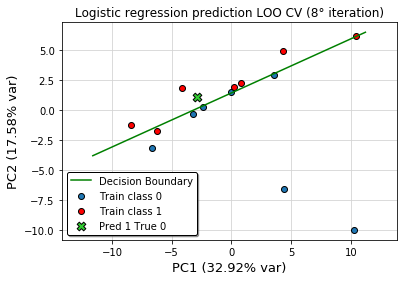

Iteration 8 error = 1.0


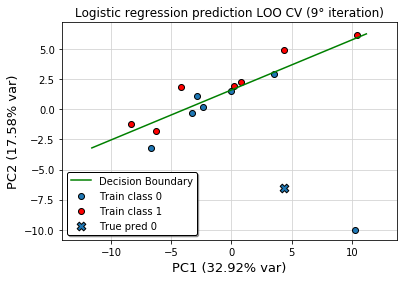

Iteration 9 error = 0.0


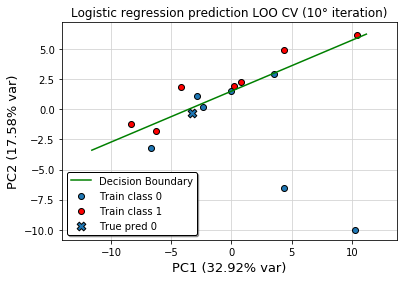

Iteration 10 error = 0.0


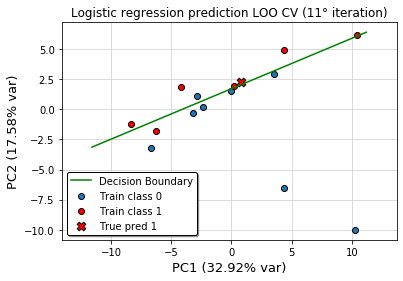

Iteration 11 error = 0.0


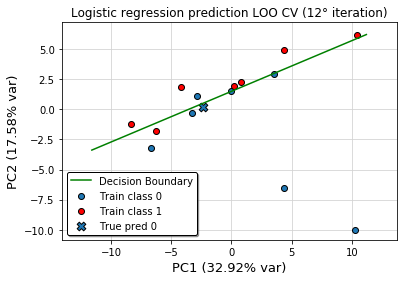

Iteration 12 error = 0.0


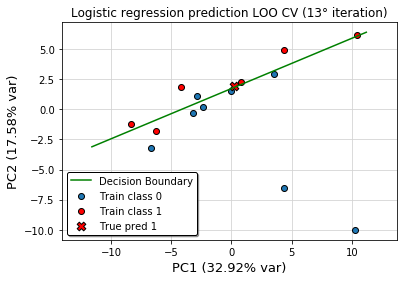

Iteration 13 error = 0.0


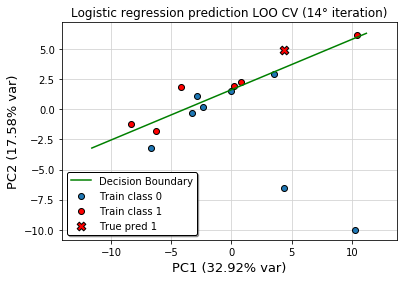

Iteration 14 error = 0.0


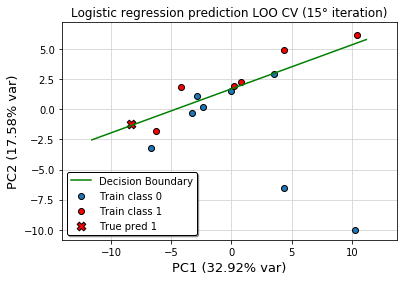

Iteration 15 error = 0.0
Total CV iterations = 15
Misclassified samples = 5
Average CV accuracy = 66.667%


In [11]:
# Out of sample accuracy logistic regression
def log_reg_visualization_cv(xtrain, ytrain, 
                             kfold=5, plot=True, print_iterations=True): 
    cv = KFold(n_splits = kfold, shuffle = True)
    error = 0
    # Loop over CV folds
    i = 1
    for train, test in cv.split(xtrain):  
        # Split
        XTrainCV, XTestCV, YTrainCV, YTestCV = xtrain[train] ,xtrain[test] ,ytrain[train] ,ytrain[test]
        # Get the logistic regression parameters by gradient descent
        w, _ = logistic_reg(XTrainCV, YTrainCV)
        # Get predictions
        _, ypred = logistic_pred(XTestCV, w)
        # Plot 
        if plot == True:
            if kfold == len(xtrain):
                cv_title = "LOO"
            else:
                cv_title = str(kfold) + "-fold"
            visualize_classifier_pred(XTrainCV, YTrainCV, XTestCV, YTestCV, ypred,
                                      a_xlim = -1.6, bxlim = 5,
                                      title = "Logistic regression prediction " + cv_title + " CV (" + str(i) + "° iteration)",
                                      save = False)
        # Save error
        iteration_error = zero_one_error(ypred, YTestCV)
        error += iteration_error
        if print_iterations == True:
            print("Iteration {} error = {}".format(i, iteration_error))
        i += 1
    print("Total CV iterations =", i-1)
    if kfold == len(xtrain):
        print("Misclassified samples =", int(error))
    print("Average CV accuracy = {:.3f}%".format((1 - (error/(i-1))) * 100))
                                   
log_reg_visualization_cv(XTrain_2D, YTrain, 15)   

### Training and test accuracy without PCA

In [12]:
print("Prediction on training set without PCA:")
ypred = logistic_train_and_pred(XTrain, YTrain, XTrain, print_w=True)
error = zero_one_error(ypred, YTrain)
print("Accuracy = {:.3f}%".format((1 - error) * 100))

print("\nPrediction on test set (LOO CV) without PCA:")
log_reg_visualization_cv(XTrain, YTrain, 15, plot=False, print_iterations=False) 

Prediction on training set without PCA:
Parameters of the linear model =
 [ -3.56791448  -7.02327402  -8.19146426   3.64967531   2.81640753
  -2.44905654  -5.62949995  -5.12123848  -3.26079212   2.03165009
   1.46710138   4.46352114   1.00287465 -10.92761608  -4.25539807
  -2.16803839   4.69413262  -4.19898279  -1.74853356  -4.33657477
   2.90642986   1.0472054   -5.53335792  -4.49979485  -1.64311734
   0.70811215  -0.48983601   5.9734749   -0.97095152   8.25289688
   0.08206087   1.84987059   5.01118284  -3.67464849   2.87611191
  -4.68600781  -0.66100863  -6.25208171  -7.67108301   0.62339417
   3.24788491  -5.83949265   3.77033208   3.60240478  -0.05283011
  -1.89394168  -0.17292682   2.92327941  -2.70249373   1.33268454
   0.53067919  -0.29673522  -1.79356714  -2.33279249  -1.42224733
  -5.20691689  -4.00052808  -5.41113926   6.19038549  -0.56780801
   0.49251777  -7.97512401   5.94069199  -0.9881482    8.38091933
  -0.54577069  -7.47032321  10.84388844  11.18618434]
Accuracy = 100

#### Save logistic regression coefficients

In [13]:
# Convert to pd
def weights_to_pd(weights, data):
    log_weights = pd.DataFrame(weights, columns=["Log_weights"])
    colnames = data.columns.values
    log_weights = log_weights.set_index(colnames)
    return log_weights

log_weights = logistic_reg(XTrain, YTrain)[0]
log_weights = weights_to_pd(log_weights[1:], data)

# Save weights
filename = "logistic_weights_new01"
if use_gender_one_hot_encoding:
    filename += "_gender_encoded"
if use_cancer_type == False:
    filename += "_no_subtype"

log_weights.to_csv(filename + ".txt", sep='\t', index=True)
log_weights

,Log_weights
S_1,-7.023274
S_2,-8.191464
S_3,3.649675
S_4,2.816408
S_5,-2.449057
...,...
S_59,8.380919
S_60,-0.545771
Age,-7.470323
Gender,10.843888


## Logistic regression with sckitlearn

In [14]:
# Out of sample accuracy logistic regression
def scikit_log_reg_visualization_cv(xtrain, ytrain, 
                                    kfold=5, plot=True, print_iterations=True):
    cv = KFold(n_splits = kfold, shuffle = True)
    error = 0
    # Loop over CV folds
    i = 1
    for train, test in cv.split(xtrain):  
        # Split
        XTrainCV, XTestCV, YTrainCV, YTestCV = xtrain[train] ,xtrain[test] ,ytrain[train] ,ytrain[test]
        # Logistic regression
        clf = LogisticRegression(solver='lbfgs',  
                                 max_iter = 2000, 
                                 random_state=0).fit(XTrainCV, YTrainCV)
        # Get predictions
        ypred = clf.predict(XTestCV)
        # Plot 
        if plot == True:
            if kfold == len(xtrain):
                cv_title = "LOO"
            else:
                cv_title = str(kfold) + "-fold"
            visualize_classifier_pred(XTrainCV, YTrainCV, XTestCV, YTestCV, ypred,
                                      a_xlim = -1.6, bxlim = 5,
                                      title = "Logistic regression prediction " + cv_title + " CV (" + str(i) + "° iteration)",
                                      save = False,
                                      use_scikit_learn = True)
        # Save error
        iteration_error = zero_one_error(ypred, YTestCV)
        error += iteration_error
        if print_iterations == True:
            print("Iteration {} error = {}".format(i, iteration_error))
        i += 1
    print("Total CV iterations =", i-1)
    if kfold == len(xtrain):
        print("Misclassified samples =", int(error))
    print("Average CV accuracy = {:.3f}%".format((1 - (error/(i-1))) * 100))

### Accuracy and visualization on training set
#### After PCA


> Training data:
Training error = 0.200
Training accuracy = 80.000%
Parameters of the linear model =
 [-1.29500428 -0.32748624  0.85672325]


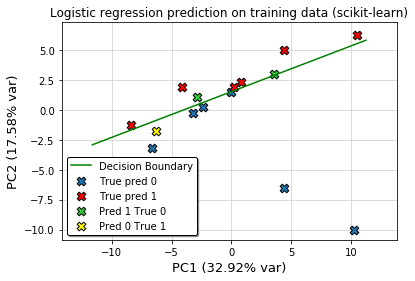

In [15]:
print("\n> Training data:")
clf = LogisticRegression(solver='lbfgs', random_state=0, max_iter = 2000).fit(XTrain_2D, YTrain)
ypred = clf.predict(XTrain_2D)
print("Training error = {:.3f}".format(zero_one_error(ypred, YTrain)))
print("Training accuracy = {:.3f}%".format((1 - zero_one_error(ypred, YTrain))* 100))
w = np.insert(clf.coef_, 0, clf.intercept_)
print("Parameters of the linear model =\n", w)


visualize_classifier_pred(XTrain_2D, YTrain, XTrain_2D, YTrain, ypred,
                          a_xlim = -1.6, bxlim = 5,
                          title = "Logistic regression prediction on training data (scikit-learn)",
                          save = False, CV = False,
                          use_scikit_learn = True)

#### Without PCA

In [16]:
print("\n> Training data:")
clf = LogisticRegression(solver='lbfgs', random_state=0, max_iter = 2000).fit(XTrain, YTrain)
ypred = clf.predict(XTrain)
print("Training error = {:.3f}".format(zero_one_error(ypred, YTrain)))
print("Training accuracy = {:.3f}%".format((1 - zero_one_error(ypred, YTrain))* 100))
w = np.array(clf.coef_[0])
print("Parameters of the linear model =\n", w)

# Save weights
w = weights_to_pd(w, data)
w.to_csv(filename + "_scikitlearn.txt", sep='\t', index=True)
w


> Training data:
Training error = 0.000
Training accuracy = 100.000%
Parameters of the linear model =
 [-3.27211043e-01 -4.27654140e-01  1.24678984e-01  1.76113584e-01
 -1.33402869e-01 -2.71807945e-01 -2.68309167e-01 -1.73133027e-01
  1.50042728e-02  6.81660244e-02  2.18284545e-01  7.92195455e-03
 -4.43982956e-01 -3.00898205e-01 -1.30825950e-01  2.16820794e-01
 -2.85786207e-01 -1.91545183e-04 -1.60507261e-01  1.41503179e-01
  4.95010108e-03 -3.24127727e-01 -1.48254262e-01 -1.22056739e-01
  7.88354294e-02 -3.13924719e-03  2.71648449e-01 -8.13613972e-02
  3.88722015e-01 -4.05291118e-03  1.28252850e-01  1.71257875e-01
 -2.46243792e-01  1.70089312e-01 -2.38761535e-01 -4.42520781e-02
 -3.03887489e-01 -3.11531178e-01 -5.13080201e-02  1.55562865e-01
 -1.84307336e-01  2.00420124e-01  2.36748030e-01 -4.54706401e-02
 -1.15257885e-01 -1.04292347e-01  7.97715777e-02 -5.27236773e-03
  6.57714006e-02  1.12362686e-01 -6.47590091e-05 -1.00163935e-01
 -1.62593353e-02  3.47993881e-02 -2.44644536e-01 -1

,Log_weights
S_1,-0.327211
S_2,-0.427654
S_3,0.124679
S_4,0.176114
S_5,-0.133403
...,...
S_59,0.447450
S_60,0.055304
Age,-0.285089
Gender,0.460084


### Accuracy and visualization on test set (LOO CV)
#### After PCA

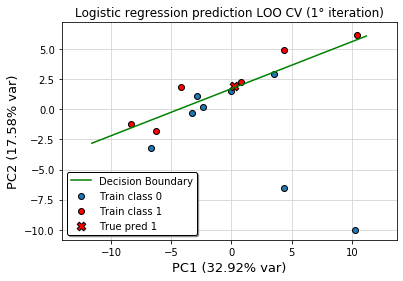

Iteration 1 error = 0.0


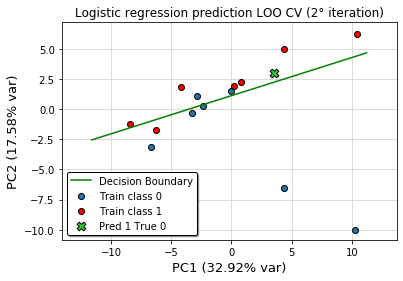

Iteration 2 error = 1.0


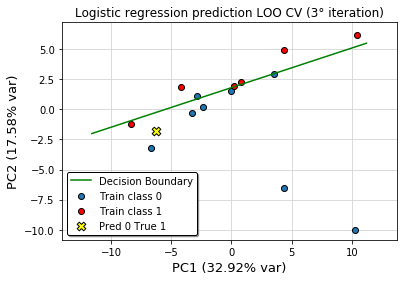

Iteration 3 error = 1.0


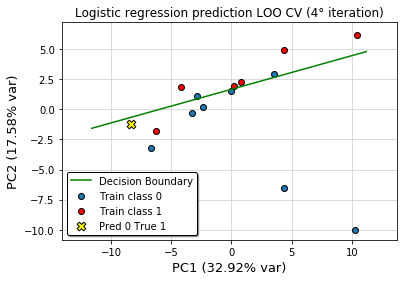

Iteration 4 error = 1.0


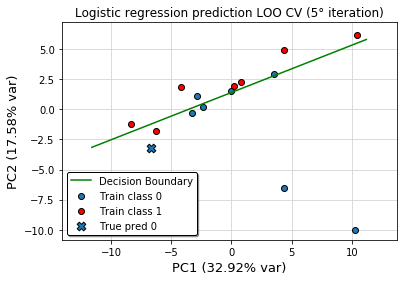

Iteration 5 error = 0.0


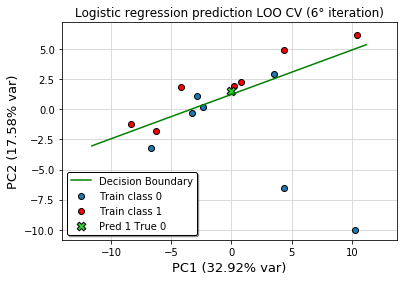

Iteration 6 error = 1.0


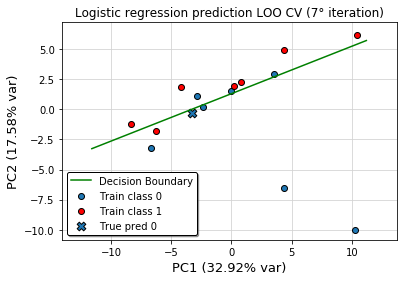

Iteration 7 error = 0.0


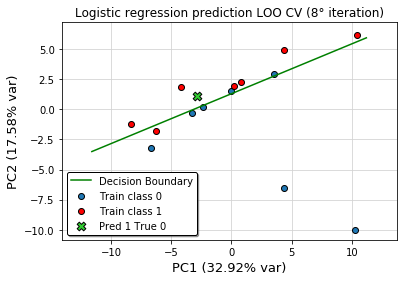

Iteration 8 error = 1.0


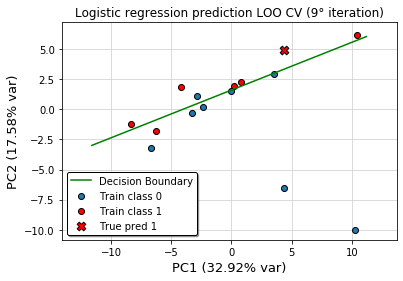

Iteration 9 error = 0.0


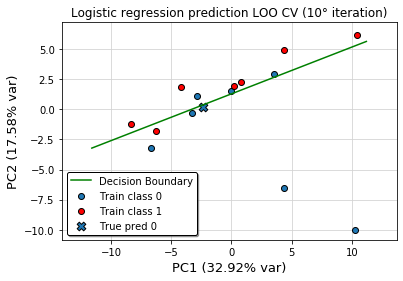

Iteration 10 error = 0.0


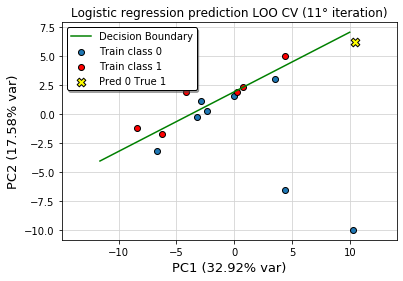

Iteration 11 error = 1.0


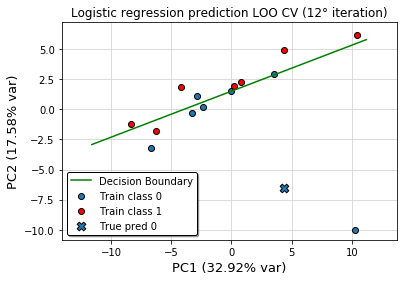

Iteration 12 error = 0.0


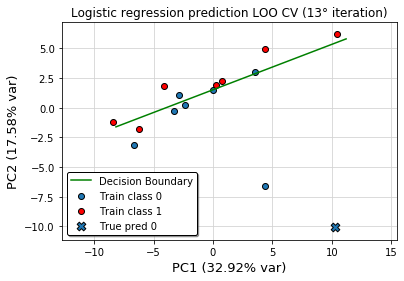

Iteration 13 error = 0.0


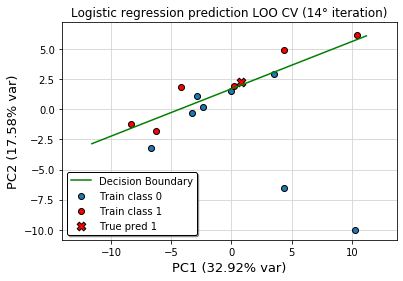

Iteration 14 error = 0.0


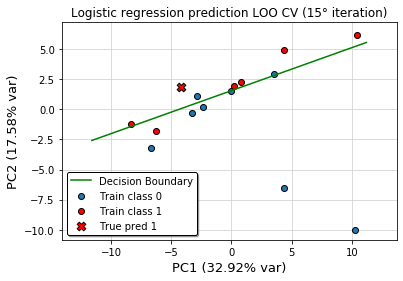

Iteration 15 error = 0.0
Total CV iterations = 15
Misclassified samples = 6
Average CV accuracy = 60.000%


In [17]:
scikit_log_reg_visualization_cv(XTrain_2D, YTrain, 15)   

#### Without PCA

In [18]:
scikit_log_reg_visualization_cv(XTrain, YTrain, 15, 
                                plot=False, print_iterations=False)   

Total CV iterations = 15
Misclassified samples = 8
Average CV accuracy = 46.667%


## 1-Nearest Neighbor
### 1-NN prediction after PCA
#### Accuracy and visualization on training set

In [19]:
def KNN_visualization_cv(xtrain, ytrain, 
                         kfold=5, k=1, plot=True, 
                         print_iterations=True, 
                         return_error=False, print_only_accuracy=False):
    """
    Test the performance of the knn model by 
    cross-validation.
    """    
    cv = KFold(n_splits = kfold, shuffle = True)
    error = 0
    # Loop over CV folds
    i = 1
    for train, test in cv.split(xtrain):  
        # Split
        XTrainCV, XTestCV, YTrainCV, YTestCV = xtrain[train] ,xtrain[test] ,ytrain[train] ,ytrain[test]
        # Train the model
        knn = KNeighborsClassifier(n_neighbors = k)
        knn_train = knn.fit(XTrainCV,YTrainCV) 
        # Get predictions
        ypred = knn_train.predict(XTestCV)
        # Plot 
        if plot == True:
            if kfold == len(xtrain):
                cv_title = "LOO"
            else:
                cv_title = str(kfold) + "-fold"
            visualize_classifier_pred(XTrainCV, YTrainCV, XTestCV, YTestCV, ypred,
                                      a_xlim = -1.8, bxlim = -2,
                                      title = "Nearest neighbor prediction " + cv_title + " CV (" + str(i) + "° iteration)",
                                      decision_boundary = False,
                                      save = False)
        # Save error
        iteration_error = zero_one_error(ypred, YTestCV)
        error += iteration_error
        if print_iterations == True:
            print("Iteration {} error = {}".format(i, iteration_error))
        i += 1
    if print_only_accuracy == False:
        print("Total CV iterations =", i-1)
        if kfold == len(xtrain):
            print("Misclassified samples =", int(error))
    error = error/(i-1)
    print("Average CV accuracy = {:.3f}%".format((1 - error) * 100))
    if return_error == True:
        return error

In [20]:
# Find best k
def get_knn_bestk_cv(xtrain, ytrain, kmax=10):
    """
    Find the best k-hyperparameter for k-nearest neighbour
    classification by performing cross-validation on the 
    training dataset.
    """
    best_k = 0
    best_acc = 0
    # Perform k-NN for k between 1 and kmax
    for k in range(1, kmax, 2):
        print("K =", k)
        error = KNN_visualization_cv(xtrain, ytrain, 
                                     kfold=15, 
                                     k = k,
                                     return_error=True, 
                                     plot=False, 
                                     print_iterations=False,
                                     print_only_accuracy=True)
        accuracy = 1 - error
        if accuracy > best_acc:
            best_k, best_acc = k, accuracy
    return best_acc, best_k

accuracy, best_k = get_knn_bestk_cv(XTrain_2D, YTrain)   
print("K-best CV = {}, {:.3f}% accuracy".format( best_k, accuracy * 100))    

K = 1
Average CV accuracy = 53.333%
K = 3
Average CV accuracy = 46.667%
K = 5
Average CV accuracy = 53.333%
K = 7
Average CV accuracy = 33.333%
K = 9
Average CV accuracy = 13.333%
K-best CV = 1, 53.333% accuracy


Prediction on training set:
Accuracy = 100.000%


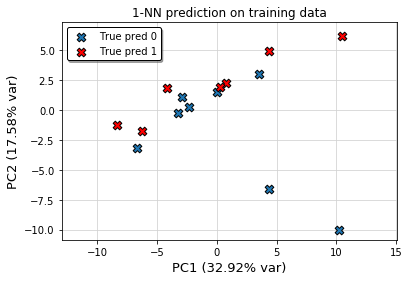

In [21]:
print("Prediction on training set:")
# Train the model
knn = KNeighborsClassifier(n_neighbors = best_k)
knn_train = knn.fit(XTrain_2D, YTrain) 
# Get predictions
ypred = knn_train.predict(XTrain_2D)
# Compute accuracy
error = zero_one_error(ypred, YTrain)
print("Accuracy = {:.3f}%".format((1 - error) * 100))

# Plot predictions
visualize_classifier_pred(XTrain_2D, YTrain, XTrain_2D, YTrain, ypred,
                          a_xlim = -1.8, bxlim = -2,
                          title = "1-NN prediction on training data",
                          save = False, CV = False,
                          decision_boundary = False)

#### Accuracy and visualization on test set (LOO CV)

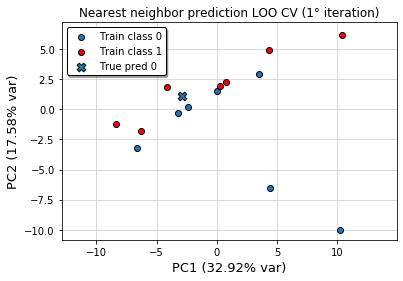

Iteration 1 error = 0.0


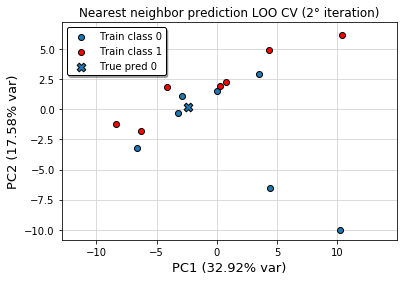

Iteration 2 error = 0.0


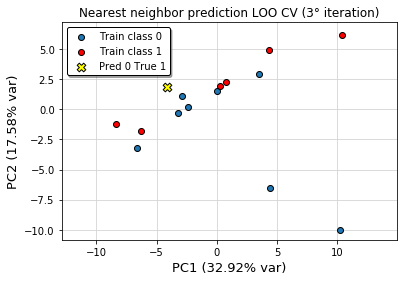

Iteration 3 error = 1.0


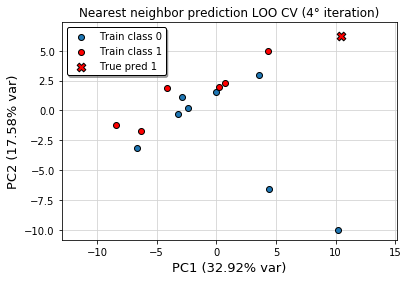

Iteration 4 error = 0.0


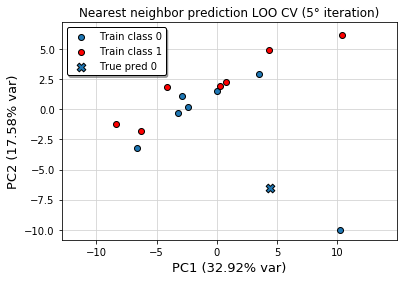

Iteration 5 error = 0.0


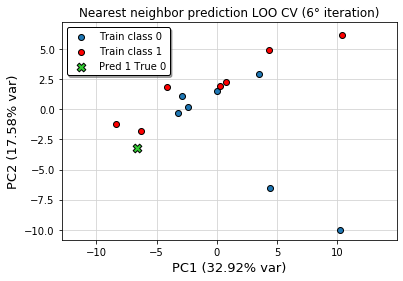

Iteration 6 error = 1.0


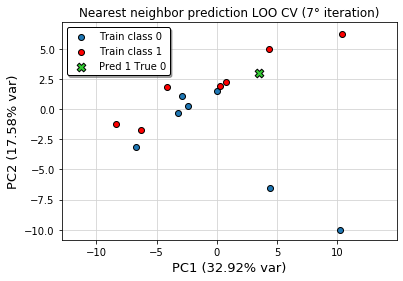

Iteration 7 error = 1.0


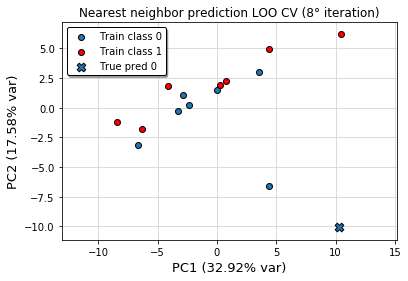

Iteration 8 error = 0.0


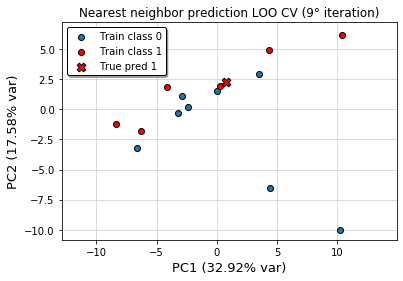

Iteration 9 error = 0.0


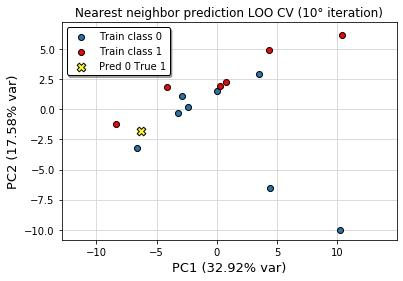

Iteration 10 error = 1.0


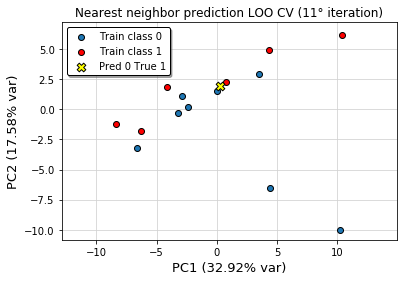

Iteration 11 error = 1.0


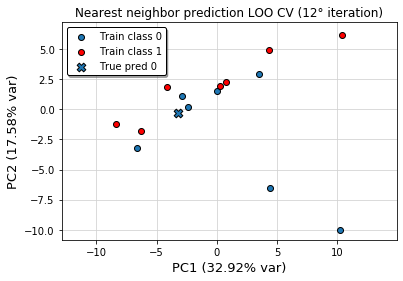

Iteration 12 error = 0.0


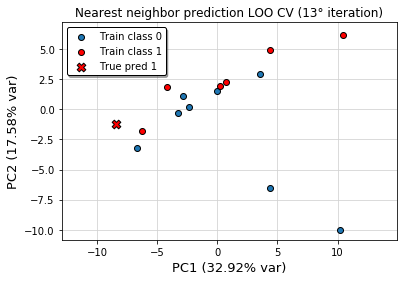

Iteration 13 error = 0.0


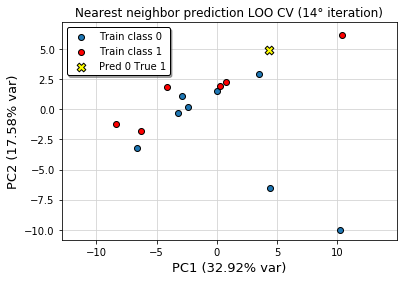

Iteration 14 error = 1.0


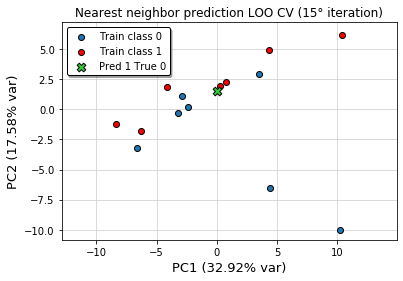

Iteration 15 error = 1.0
Total CV iterations = 15
Misclassified samples = 7
Average CV accuracy = 53.333%


In [22]:
# Out of sample accuracy KNN
KNN_visualization_cv(XTrain_2D, YTrain, k=best_k, kfold=15)   

### 1-NN accuracy without PCA

In [23]:
# Training accuracy
print("Training accuracy without PCA:")
# Train the model
knn = KNeighborsClassifier(n_neighbors = best_k)
knn_train = knn.fit(XTrain, YTrain) 
# Get predictions
ypred = knn_train.predict(XTrain)
# Compute accuracy
error = zero_one_error(ypred, YTrain)
print("Accuracy = {:.3f}%".format((1 - error) * 100))

# Test accuracy
print("\nTest accuracy without PCA:")
accuracy, best_k = get_knn_bestk_cv(XTrain, YTrain)   
print("K-best CV = {}, {:.3f}% accuracy".format( best_k, accuracy * 100))   

Training accuracy without PCA:
Accuracy = 100.000%

Test accuracy without PCA:
K = 1
Average CV accuracy = 53.333%
K = 3
Average CV accuracy = 46.667%
K = 5
Average CV accuracy = 40.000%
K = 7
Average CV accuracy = 26.667%
K = 9
Average CV accuracy = 20.000%
K-best CV = 1, 53.333% accuracy


## Random forest
### Random forest prediction after PCA
#### Accuracy and visualization on training set

Prediction on training set:
Accuracy = 100.000%


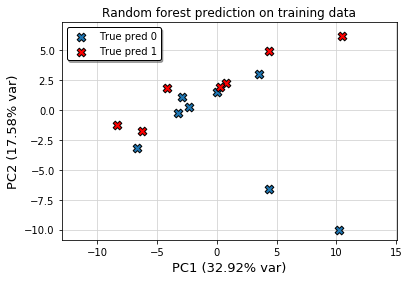

In [24]:
print("Prediction on training set:")
# Train the model
forest = RandomForestClassifier(n_estimators=100, bootstrap=True)
forest.fit(XTrain_2D, YTrain)
# Get predictions
ypred = forest.predict(XTrain_2D)
error = zero_one_error(ypred, YTrain)
print("Accuracy = {:.3f}%".format((1 - error) * 100))

# Plot predictions
visualize_classifier_pred(XTrain_2D, YTrain, XTrain_2D, YTrain, ypred,
                          a_xlim = -1.8, bxlim = -2,
                          title = "Random forest prediction on training data",
                          save = False, CV = False,
                          decision_boundary = False)

#### Accuracy and visualization on test set

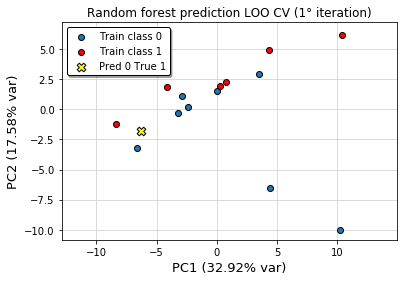

Iteration 1 error = 1.0


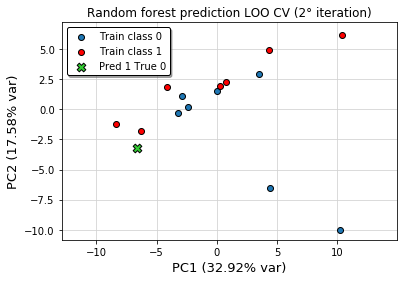

Iteration 2 error = 1.0


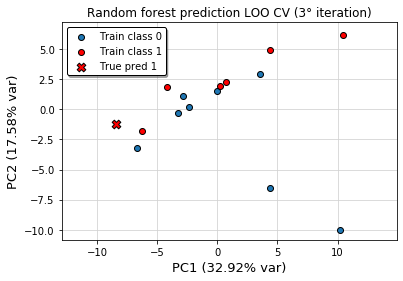

Iteration 3 error = 0.0


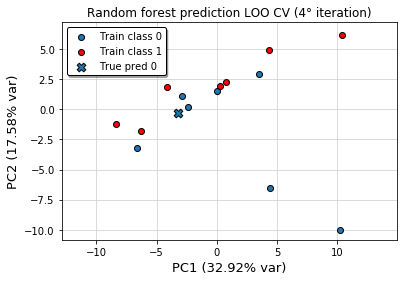

Iteration 4 error = 0.0


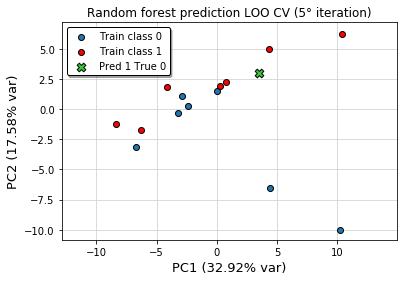

Iteration 5 error = 1.0


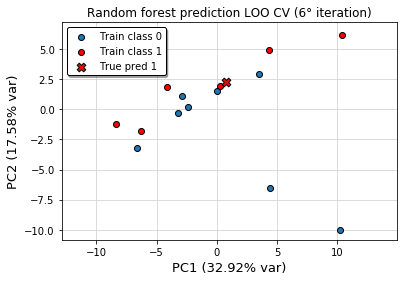

Iteration 6 error = 0.0


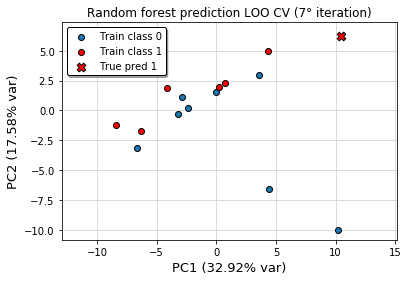

Iteration 7 error = 0.0


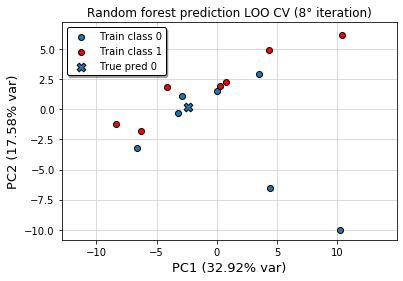

Iteration 8 error = 0.0


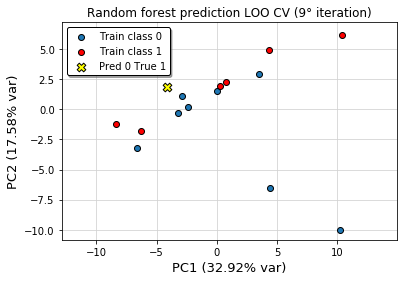

Iteration 9 error = 1.0


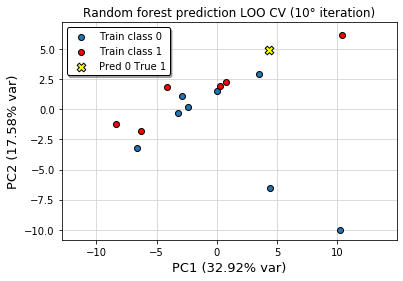

Iteration 10 error = 1.0


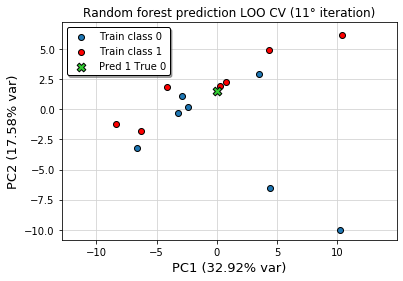

Iteration 11 error = 1.0


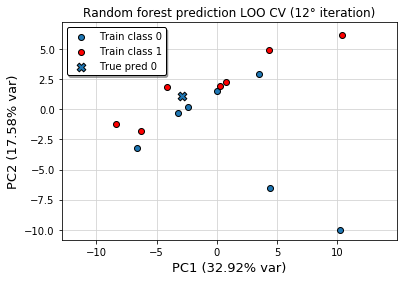

Iteration 12 error = 0.0


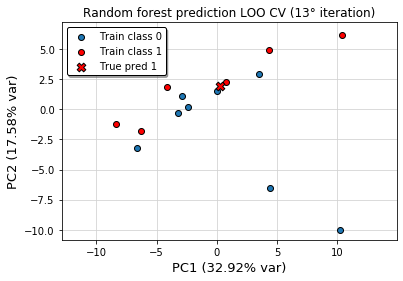

Iteration 13 error = 0.0


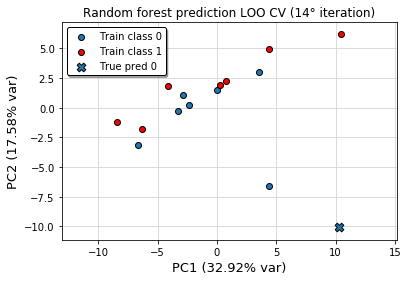

Iteration 14 error = 0.0


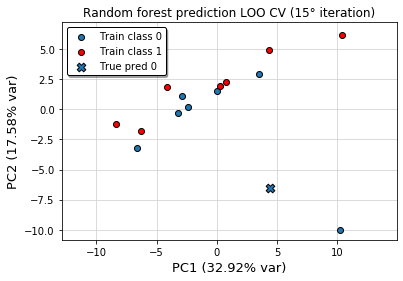

Iteration 15 error = 0.0
Total CV iterations = 15
Misclassified samples = 6
Average CV accuracy = 60.000%


0.4

In [25]:
def Rforest_visualization_cv(xtrain, ytrain, 
                             kfold=5, plot=True, 
                             print_iterations=True,
                             print_only_accuracy=False,
                             n_trees=100):
    """
    Test the performance of the knn model by 
    cross-validation.
    """    
    cv = KFold(n_splits = kfold, shuffle = True)
    error = 0
    # Loop over CV folds
    i = 1
    for train, test in cv.split(xtrain):  
        # Split
        XTrainCV, XTestCV, YTrainCV, YTestCV = xtrain[train] ,xtrain[test] ,ytrain[train] ,ytrain[test]
        # Train the model
        forest = RandomForestClassifier(n_estimators=n_trees, bootstrap=True)
        forest.fit(XTrainCV, YTrainCV)
        # Get predictions
        ypred = forest.predict(XTestCV)
        # Plot 
        if plot == True:
            if kfold == len(xtrain):
                cv_title = "LOO"
            else:
                cv_title = str(kfold) + "-fold"
            visualize_classifier_pred(XTrainCV, YTrainCV, XTestCV, YTestCV, ypred,
                                      a_xlim = -1.8, bxlim = -2,
                                      title = "Random forest prediction " + cv_title + " CV (" + str(i) + "° iteration)",
                                      decision_boundary = False,
                                      save = False)
        # Save error
        iteration_error = zero_one_error(ypred, YTestCV)
        error += iteration_error
        if print_iterations == True:
            print("Iteration {} error = {}".format(i, iteration_error))
        i += 1
    if print_only_accuracy == False:
        print("Total CV iterations =", i-1)
        if kfold == len(xtrain):
            print("Misclassified samples =", int(error))
    error = error/(i-1)
    print("Average CV accuracy = {:.3f}%".format((1 - error) * 100))
    return error

Rforest_visualization_cv(XTrain_2D, YTrain, 15)   

#### Average accuracy on test set after 100 iterations

In [26]:
def Rforest_average_accuracy_cv(XTrain, YTrain, kfold=5, iterations=100):
    error = 0
    i = 1    
    for n in range(iterations):  
        iteration_error = Rforest_visualization_cv(XTrain, YTrain, kfold, plot=False, 
                                                   print_iterations=False,
                                                   print_only_accuracy=True)
        error += iteration_error
        i += 1
    average_error = error/iterations
    print("Total average accuracy after {} iterations = {:.3f}%".format(iterations, (1 - average_error) * 100))
    
Rforest_average_accuracy_cv(XTrain_2D, YTrain, kfold=15)         

Average CV accuracy = 53.333%
Average CV accuracy = 53.333%
Average CV accuracy = 53.333%
Average CV accuracy = 53.333%
Average CV accuracy = 60.000%
Average CV accuracy = 60.000%
Average CV accuracy = 53.333%
Average CV accuracy = 66.667%
Average CV accuracy = 66.667%
Average CV accuracy = 66.667%
Average CV accuracy = 53.333%
Average CV accuracy = 53.333%
Average CV accuracy = 60.000%
Average CV accuracy = 53.333%
Average CV accuracy = 53.333%
Average CV accuracy = 53.333%
Average CV accuracy = 60.000%
Average CV accuracy = 66.667%
Average CV accuracy = 60.000%
Average CV accuracy = 60.000%
Average CV accuracy = 53.333%
Average CV accuracy = 53.333%
Average CV accuracy = 53.333%
Average CV accuracy = 60.000%
Average CV accuracy = 66.667%
Average CV accuracy = 60.000%
Average CV accuracy = 53.333%
Average CV accuracy = 60.000%
Average CV accuracy = 53.333%
Average CV accuracy = 66.667%
Average CV accuracy = 53.333%
Average CV accuracy = 66.667%
Average CV accuracy = 53.333%
Average CV

### Random forest accuracy without PCA
#### Accuracy on training set

In [27]:
print("Prediction on training set:")
# Train the model
forest = RandomForestClassifier(n_estimators=100, bootstrap=True)
forest.fit(XTrain, YTrain)
# Get predictions
ypred = forest.predict(XTrain)
error = zero_one_error(ypred, YTrain)
print("Accuracy = {:.3f}%".format((1 - error) * 100))

# Save features importance
forest_features_importance = weights_to_pd(forest.feature_importances_, data)
forest_features_importance.to_csv("rforest_features_importance_100.txt", sep='\t', index=True)
forest_features_importance

Prediction on training set:
Accuracy = 100.000%


,Log_weights
S_1,0.000000
S_2,0.042965
S_3,0.016172
S_4,0.013703
S_5,0.023273
...,...
S_59,0.014472
S_60,0.010059
Age,0.004786
Gender,0.000000


#### Average accuracy on test set after 100 iterations

In [28]:
Rforest_average_accuracy_cv(XTrain, YTrain, kfold=15)    

Average CV accuracy = 46.667%
Average CV accuracy = 46.667%
Average CV accuracy = 53.333%
Average CV accuracy = 53.333%
Average CV accuracy = 46.667%
Average CV accuracy = 60.000%
Average CV accuracy = 60.000%
Average CV accuracy = 46.667%
Average CV accuracy = 53.333%
Average CV accuracy = 46.667%
Average CV accuracy = 40.000%
Average CV accuracy = 46.667%
Average CV accuracy = 46.667%
Average CV accuracy = 66.667%
Average CV accuracy = 46.667%
Average CV accuracy = 46.667%
Average CV accuracy = 53.333%
Average CV accuracy = 60.000%
Average CV accuracy = 53.333%
Average CV accuracy = 46.667%
Average CV accuracy = 40.000%
Average CV accuracy = 40.000%
Average CV accuracy = 53.333%
Average CV accuracy = 46.667%
Average CV accuracy = 53.333%
Average CV accuracy = 60.000%
Average CV accuracy = 33.333%
Average CV accuracy = 53.333%
Average CV accuracy = 46.667%
Average CV accuracy = 66.667%
Average CV accuracy = 46.667%
Average CV accuracy = 40.000%
Average CV accuracy = 46.667%
Average CV

## Classification report and ROC curve

In [54]:
from sklearn.metrics import classification_report

def logit_pred_and_truelabels(xtrain, ytrain):
    """
    Test the performance of the knn model by 
    cross-validation.
    """    
    cv = KFold(n_splits = 15)
    pred = []
    prob = []
    true_labels = []
    # Loop over CV folds
    for train, test in cv.split(xtrain):  
        # Split
        XTrainCV, XTestCV, YTrainCV, YTestCV = xtrain[train] ,xtrain[test] ,ytrain[train] ,ytrain[test]
        # Logistic regression
        clf = LogisticRegression(solver='lbfgs',  
                                 max_iter = 2000, 
                                 random_state=0).fit(XTrainCV, YTrainCV)
        # Get predictions
        ypred = clf.predict(XTestCV)
        yprob = clf.predict_proba(XTestCV)
        pred.append(ypred[0])
        prob.append(yprob[0])
        true_labels.append(YTestCV[0])
    return np.array(pred), np.array(prob), np.array(true_labels)

print("Logistic regression performance:\n")
logit_ypred, logit_yprob, logit_ytrue = logit_pred_and_truelabels(XTrain_2D, YTrain)
print(classification_report(logit_ytrue, logit_ypred))

Logistic regression performance:

              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.57      0.57      0.57         7

    accuracy                           0.60        15
   macro avg       0.60      0.60      0.60        15
weighted avg       0.60      0.60      0.60        15



In [55]:
def knn_pred_and_truelabels(xtrain, ytrain):
    """
    Test the performance of the knn model by 
    cross-validation.
    """    
    cv = KFold(n_splits = 15)
    pred = []
    prob = []
    true_labels = []
    # Loop over CV folds
    for train, test in cv.split(xtrain):  
        # Split
        XTrainCV, XTestCV, YTrainCV, YTestCV = xtrain[train] ,xtrain[test] ,ytrain[train] ,ytrain[test]
        # Logistic regression
        knn = KNeighborsClassifier(n_neighbors = best_k)
        knn_train = knn.fit(XTrainCV,YTrainCV) 
        # Get predictions
        ypred = knn_train.predict(XTestCV)
        pred.append(ypred[0])
        true_labels.append(YTestCV[0])
    return np.array(pred), np.array(true_labels)

print("1-NN performance:\n")
knn_ypred, knn_ytrue = knn_pred_and_truelabels(XTrain_2D, YTrain)
print(classification_report(knn_ytrue, knn_ypred))

1-NN performance:

              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.50      0.43      0.46         7

    accuracy                           0.53        15
   macro avg       0.53      0.53      0.52        15
weighted avg       0.53      0.53      0.53        15



In [56]:
def rforest_pred_and_truelabels(xtrain, ytrain):
    """
    Test the performance of the knn model by 
    cross-validation.
    """    
    cv = KFold(n_splits = 15)
    pred = []
    prob = []
    true_labels = []
    # Loop over CV folds
    for train, test in cv.split(xtrain):  
        # Split
        XTrainCV, XTestCV, YTrainCV, YTestCV = xtrain[train] ,xtrain[test] ,ytrain[train] ,ytrain[test]
        # Logistic regression
        forest = RandomForestClassifier(n_estimators=100, bootstrap=True)
        forest.fit(XTrainCV, YTrainCV)
        # Get predictions
        ypred = forest.predict(XTestCV)
        yprob = forest.predict_proba(XTestCV)
        pred.append(ypred[0])
        prob.append(yprob[0])
        true_labels.append(YTestCV[0])
    return pred, np.array(prob), true_labels

print("Random forest performance:\n")
rforest_ypred, rforest_yprob, rforest_ytrue = rforest_pred_and_truelabels(XTrain_2D, YTrain)
print(classification_report(rforest_ytrue, rforest_ypred))

def iterations_for_report(xtrain, ytrain):
    rforest_ypred = []
    rforest_yprob = []
    rforest_ytrue = []
    for n in range(100):
        rforest_ypred_n, rforest_yprob_n, rforest_ytrue_n = rforest_pred_and_truelabels(xtrain, ytrain)
        if n % 10 == 0:
            print("Iteration", n)
        rforest_ypred.append(rforest_ypred_n)
        rforest_yprob.append(rforest_yprob_n[:,1])
        rforest_ytrue.append(rforest_ytrue_n)
    
    print(np.shape(rforest_ypred),
     np.shape(rforest_yprob),
     np.shape(rforest_ytrue))
    
    return np.array(rforest_ypred).reshape(-1,1), np.array(rforest_yprob).reshape(-1,1), np.array(rforest_ytrue).reshape(-1,1)

rforest_ypred, rforest_yprob, rforest_ytrue = iterations_for_report(XTrain_2D, YTrain)
print(classification_report(rforest_ytrue, rforest_ypred))

Random forest performance:

              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.62      0.71      0.67         7

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.67        15
weighted avg       0.67      0.67      0.67        15

Iteration 0
Iteration 10
Iteration 20
Iteration 30
Iteration 40
Iteration 50
Iteration 60
Iteration 70
Iteration 80
Iteration 90
(100, 15) (100, 15) (100, 15)
              precision    recall  f1-score   support

           0       0.61      0.62      0.62       800
           1       0.56      0.55      0.55       700

    accuracy                           0.59      1500
   macro avg       0.59      0.59      0.59      1500
weighted avg       0.59      0.59      0.59      1500



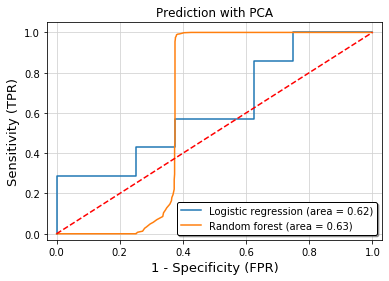

In [59]:
### ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(logit_ytrue, logit_yprob[:,1])
fpr_1, tpr_1, thresholds_1 = roc_curve(logit_ytrue, logit_yprob[:,1])

rforest_roc_auc = roc_auc_score(rforest_ytrue, rforest_yprob)
fpr_2, tpr_2, thresholds_2 = roc_curve(rforest_ytrue, rforest_yprob)

plt.figure()
plt.plot(fpr_1, tpr_1, label='Logistic regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_2, tpr_2, label='Random forest (area = %0.2f)' % rforest_roc_auc)


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.03, 1.03])
plt.ylim([-0.03, 1.05])
plot_details(title = "Prediction with PCA",
             xlabel = '1 - Specificity (FPR)', 
             ylabel = 'Sensitivity (TPR)',
             ax_equal = False,
             grid = True,
             bg = False, 
             legend = True,
             leg_loc = "lower right",
             save = False,
             filename = "results_modeling/ROC_log_reg_with_PCA.png" + title)

# Feature selection
#### (not mentioned in the report due to the small sample size, but can be used in the future for bigger one)

### Train and test split

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

XTrain = np.array(data)
YTrain = np.array(metadata["Response"])

sss = StratifiedShuffleSplit(test_size=0.25)
sss.get_n_splits(XTrain, YTrain)

for train_index, test_index in sss.split(XTrain, YTrain):
    X_train, X_test = XTrain[train_index,:], XTrain[test_index,:]
    y_train, y_test = YTrain[train_index], YTrain[test_index]
    
y_train, y_test

### Standardization

In [ ]:
# Standarize1
X_train, X_test = standardize(X_train, X_test)

### Feature selection

In [ ]:
logreg = LogisticRegression(solver='lbfgs', max_iter = 2000)
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

imp_features = rfe.support_
data_selected = data.iloc[:,imp_features]
print(np.shape(data_selected))
print("Selected features:\n", data.iloc[:,imp_features].columns.values)

In [ ]:
X_train = X_train[:,imp_features]
X_test = X_test[:,imp_features]

print(np.shape(X_train), np.shape(X_test))
print(np.shape(y_train), np.shape(y_test))

### PCA

In [ ]:
# Perform the train and test data in the space defined by the PCs obtained from the training set
X_train_2D, X_test_2D, eigvals = dim_reduction_split_data(X_train, X_test) 
pc1_label, pc2_label = eigvals[:2]
pc1_label = "PC1 (" + str(round(pc1_label, 2)) + "% var)" 
pc2_label = "PC2 (" + str(round(pc2_label, 2)) + "% var)" 

print(np.shape(X_train_2D), np.shape(X_test_2D))
print(np.shape(y_train), np.shape(y_test))

### Plot data

In [ ]:
easy_plot_classes(X_train_2D[y_train == 0,:], X_train_2D[y_train == 1,:],                        
                  title = "PCA plot on training set standardized data after features selection", save = False,                
                  xlabel = pc1_label, 
                  ylabel = pc2_label)

easy_plot_classes(X_test_2D[y_test == 0,:], X_test_2D[y_test == 1,:],                        
                  title = "PCA plot on test set standardized data after features selection", save = False,                
                  xlabel = pc1_label, 
                  ylabel = pc2_label)

## Logistic regression after feature selection

### Training and test accuracy with PCA

In [ ]:
print("\n> Training data:")
clf = LogisticRegression(solver='lbfgs', random_state=0, max_iter = 2000).fit(X_train_2D, y_train)
ypred = clf.predict(X_train_2D)
print("Training error = {:.3f}".format(zero_one_error(ypred, y_train)))
print("Training accuracy = {:.3f}%".format((1 - zero_one_error(ypred, y_train))* 100))
w = np.insert(clf.coef_, 0, clf.intercept_)
print("Parameters of the linear model =\n", w)

visualize_classifier_pred(X_train_2D, y_train, X_train_2D, y_train, ypred,
                          a_xlim = 0.5, bxlim = 1.8,
                          title = "Logistic regression prediction on training data",
                          save = False, CV = False,
                          use_scikit_learn = True)

print("\n> Test data:")
ypred = clf.predict(X_test_2D)
print("Training error = {:.3f}".format(zero_one_error(ypred, y_test)))
print("Training accuracy = {:.3f}%".format((1 - zero_one_error(ypred, y_test))* 100))
w = np.insert(clf.coef_, 0, clf.intercept_)
print("Parameters of the linear model =\n", w)

visualize_classifier_pred(X_train_2D, y_train, X_test_2D, y_test, ypred,
                          a_xlim = 10, bxlim = 14,
                          title = "Logistic regression prediction on test data",
                          save = False, CV = False,
                          use_scikit_learn = True)

#### Save weights after features selection

In [ ]:
# My logistic regression function
w = logistic_reg(X_train, y_train)[0]
w = weights_to_pd(w[1:], data_selected)
w.to_csv(filename + "_selection.txt", sep='\t', index=True)
display(w)

# Scikit-learn
clf = LogisticRegression(solver='lbfgs', random_state=0, max_iter = 2000).fit(X_train, y_train)
w = weights_to_pd(clf.coef_[0], data_selected)
w.to_csv(filename + "_scikitlearn_selection.txt", sep='\t', index=True)
w

### Training and test accuracy without PCA

In [ ]:
print("\n> Training data:")
clf = LogisticRegression(solver='lbfgs', random_state=0, max_iter = 2000).fit(X_train, y_train)
ypred = clf.predict(X_train)
print("Training error = {:.3f}".format(zero_one_error(ypred, y_train)))
print("Training accuracy = {:.3f}%".format((1 - zero_one_error(ypred, y_train))* 100))
w = np.insert(clf.coef_, 0, clf.intercept_)
print("Parameters of the linear model =\n", w)

print("\n> Test data:")
ypred = clf.predict(X_test)
print("Training error = {:.3f}".format(zero_one_error(ypred, y_test)))
print("Training accuracy = {:.3f}%".format((1 - zero_one_error(ypred, y_test))* 100))
w = np.insert(clf.coef_, 0, clf.intercept_)
print("Parameters of the linear model =\n", w)

## Random forest with feature selection

In [ ]:
def random_forest_avg_accuracy(xtrain, ytrain, xtest, ytest, no_iteartions=100):
    error = 0
    for n in range(no_iteartions):
        forest = RandomForestClassifier(n_estimators=100, bootstrap=True)
        forest.fit(xtrain, ytrain)
        # Get predictions
        ypred = forest.predict(xtest)

        # Save error
        iteration_error = zero_one_error(ypred, ytest)
        print(ypred)
        print(ytest)
        error += iteration_error
    avg_error = error/no_iteartions
    accuracy = 1-avg_error
    return(accuracy)

display(random_forest_avg_accuracy(X_train_2D, y_train, X_test_2D, y_test))
display(random_forest_avg_accuracy(X_train, y_train, X_test, y_test))

## Features selection all in one

In [ ]:
XTrain = np.array(data)
YTrain = np.array(metadata["Response"])
    
def train_test_split(X, y, test_size=0.25):  
    sss = StratifiedShuffleSplit(test_size=0.25)
    sss.get_n_splits(X, y)
    for train_index, test_index in sss.split(XTrain, YTrain):
        X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]   
    return X_train, y_train, X_test, y_test

def split_and_standardize(X, y, test_size=0.25):
    X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=test_size)
    X_train_standardized, X_test_standardized = standardize(X_train, X_test)
    return X_train_standardized, y_train, X_test_standardized, y_test

def pca_with_needed_variance(X_train, X_test, var_needed=0.8):
    eigvals, eigvect = pca(X_train)
    cum_var = np.cumsum(eigvals/np.sum(eigvals)) 
    d = get_needed_pcs(var_needed, cum_var)
    X_train_dD, X_test_dD, _ = dim_reduction_split_data(X_train, X_test, d) 
    return X_train_dD, X_test_dD
    
def random_forest_pred(X_train, y_train, X_test, y_test):
    forest = RandomForestClassifier(n_estimators=100, bootstrap=True)
    forest.fit(X_train, y_train)
    ypred = forest.predict(X_test)
    yprob = forest.predict_proba(X_test)
    return ypred, yprob[:,0], y_test    
    
def random_forest_pred_iterations(X, y, 
                                  test_size=0.25, 
                                  pca=False, var_needed=0.8, 
                                  no_iterations=100):
    tot_ypred = []
    tot_yprob = []
    tot_ytrue = [] 
    for n in range(no_iterations):
        if n % 10 == 0:
            print("Iteration", n)
        X_train, y_train, X_test, y_test = split_and_standardize(X, y, test_size=test_size)
        
        if pca:
            X_train, X_test = pca_with_needed_variance(X_train, X_test, var_needed=var_needed)
            
        ypred, yprob, ytrue = random_forest_pred(X_train, y_train, X_test, y_test)
        tot_ypred.append(ypred)
        tot_yprob.append(yprob)
        tot_ytrue.append(ytrue)
    return np.array(tot_ypred).reshape(-1,1), np.array(tot_yprob).reshape(-1,1), np.array(tot_ytrue).reshape(-1,1)

def logistic_regression_pred(X_train, y_train, X_test, y_test):
    clf = LogisticRegression(solver='lbfgs', random_state=0, max_iter = 2000).fit(X_train, y_train)
    ypred = clf.predict(X_test)
    yprob = clf.predict_proba(X_test)
    return ypred, yprob[:,0], y_test  

def logistic_pred_iterations(X, y, 
                             test_size=0.25, 
                             pca=False, var_needed=0.8, 
                             no_iterations=100):
    tot_ypred = []
    tot_yprob = []
    tot_ytrue = [] 
    for n in range(no_iterations):
        if n % 10 == 0:
            print("Iteration", n)
        X_train, y_train, X_test, y_test = split_and_standardize(X, y, test_size=test_size)
        
        if pca:
            X_train, X_test = pca_with_needed_variance(X_train, X_test, var_needed=var_needed)
            
        ypred, yprob, ytrue = logistic_regression_pred(X_train, y_train, X_test, y_test)
        tot_ypred.append(ypred)
        tot_yprob.append(yprob)
        tot_ytrue.append(ytrue)
    return np.array(tot_ypred).reshape(-1,1), np.array(tot_yprob).reshape(-1,1), np.array(tot_ytrue).reshape(-1,1)

In [ ]:
# Random forest without PCA
forest_pred, forest_prob, forest_true = random_forest_pred_iterations(XTrain, YTrain)
print(classification_report(forest_true, forest_pred))

# Logistic regression without PCA
logistic_pred, logistic_prob, logistic_true = logistic_pred_iterations(XTrain, YTrain)
print(classification_report(logistic_true, logistic_pred))

In [ ]:
# Random forest with PCA 
forest_pred, forest_prob, forest_true = random_forest_pred_iterations(XTrain, YTrain, pca=True)
print(classification_report(forest_true, forest_pred))

# Logistic regression with PCA
logistic_pred, logistic_prob, logistic_true = logistic_pred_iterations(XTrain, YTrain, pca=True)
print(classification_report(logistic_true, logistic_pred))